# Module 03: EDA

In [84]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split 
from ISLP import load_data

# set seed
seed = 2323

### We'll use the _Hitters_ data from ISLP for this activity. The metadata for _Hitters_ can be found [here](https://intro-stat-learning.github.io/ISLP/datasets/Hitters.html).

In [25]:
# Load the data
Hitters = load_data('Hitters')
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


### Determine the number of rows and columns in the dataset by returning its "shape" attribute

In [26]:
Hitters.shape

(322, 20)

### Determine whether each feature is numeric or categorical by returning the "dtype" attribute for each column

In [27]:
for col in Hitters.columns:
    print(col, Hitters[col].dtype)

AtBat int64
Hits int64
HmRun int64
Runs int64
RBI int64
Walks int64
Years int64
CAtBat int64
CHits int64
CHmRun int64
CRuns int64
CRBI int64
CWalks int64
League category
Division category
PutOuts int64
Assists int64
Errors int64
Salary float64
NewLeague category


### Before doing any other analyses, let's create training and test sets.

In [33]:
Train, Test = train_test_split(Hitters, 
                               random_state=seed, 
                               test_size=0.40, 
                               shuffle=True) 

### Based on the metadata, what is the difference between the 6 columns starting with 'C' and the 6 related columns that don't?

The 6 columns starting with 'C' are measuring the same things as the previous 6 related columns, except that 'C' columns are measuring the career total rather than just the count in one year (1986).

For example, the column HmRun has the number of homeruns the player hit in 1986, while the column CHmRun has the total number of homeruns the player hit during their career.

### On the training set, create pairwise scatterplots for each of these 6 columns with the 'Salary' variable.

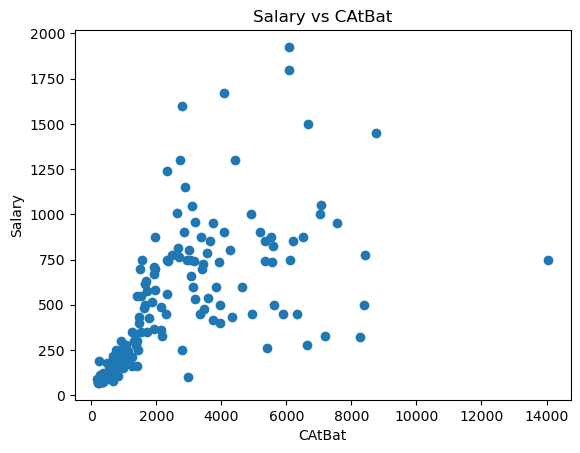

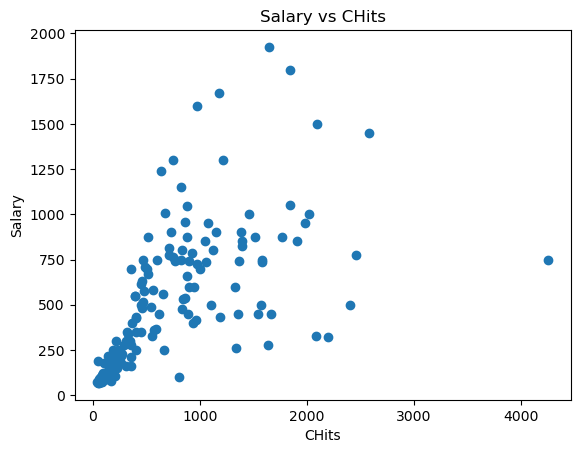

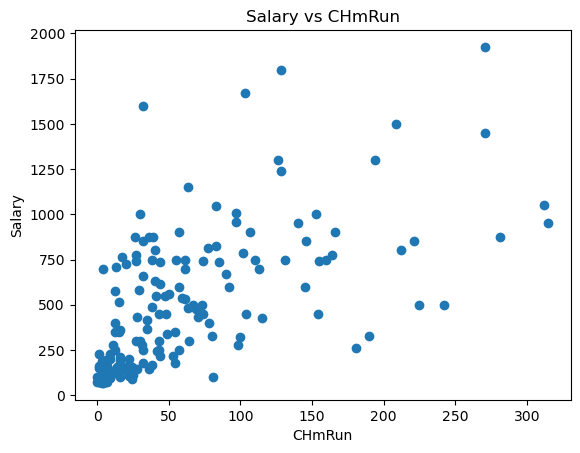

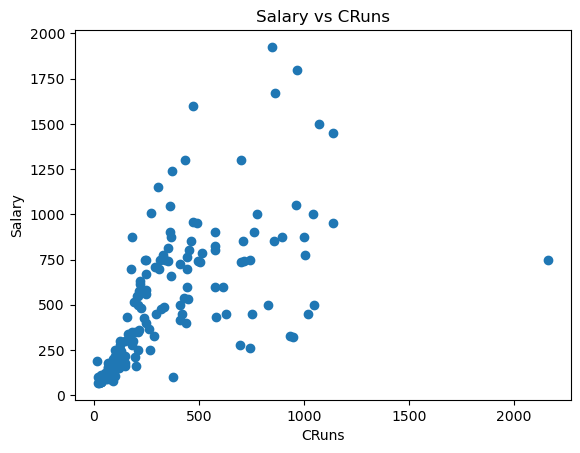

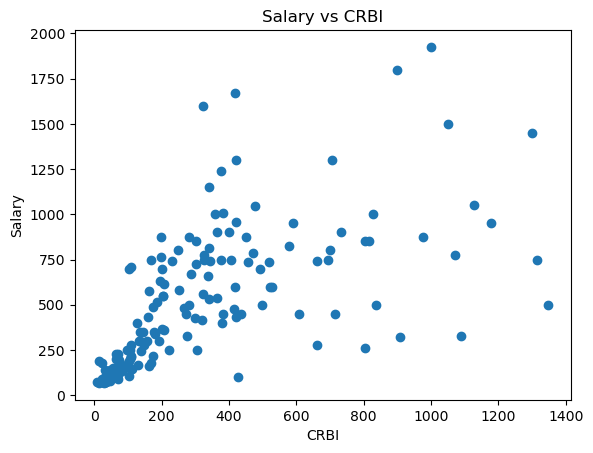

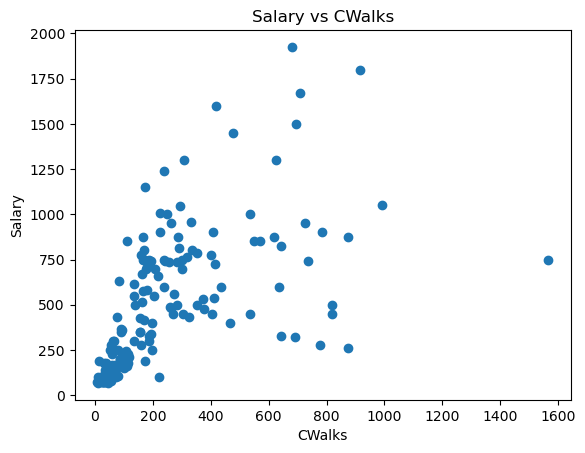

In [31]:
columns = ['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks']
Salary = Hitters['Salary']

for c in columns:
    plt.scatter(Train[c], Train['Salary'])
    plt.xlabel(c)
    plt.ylabel('Salary')
    plt.title(f'Salary vs {c}')
    plt.show()

### Use the "describe" method to determine the mean, standard deviation, and 5 number summary of all numeric variables in the training subset of _Hitters_.

In [34]:
summary = Train.describe()
print(summary)

            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  193.000000  193.000000  193.000000  193.000000  193.000000  193.000000   
mean   381.829016  101.549223   10.150259   50.751295   47.093264   38.445596   
std    145.679181   44.267521    8.228711   24.784284   24.912589   21.136915   
min     19.000000    7.000000    0.000000    1.000000    2.000000    1.000000   
25%    271.000000   68.000000    4.000000   32.000000   29.000000   22.000000   
50%    369.000000   95.000000    8.000000   47.000000   43.000000   34.000000   
75%    508.000000  136.000000   14.000000   68.000000   61.000000   53.000000   
max    687.000000  223.000000   40.000000  130.000000  121.000000  105.000000   

            Years        CAtBat        CHits      CHmRun        CRuns  \
count  193.000000    193.000000   193.000000  193.000000   193.000000   
mean     7.253886   2587.440415   702.222798   59.668394   345.378238   
std      4.858712   2285.947344   649.010165   66.4

### It looks like the mean and median of 'AtBat' are nearly equal. This _might_ suggest that this variable is normally distributed. Create a histogram of 'AtBat' to check this hypothesis.

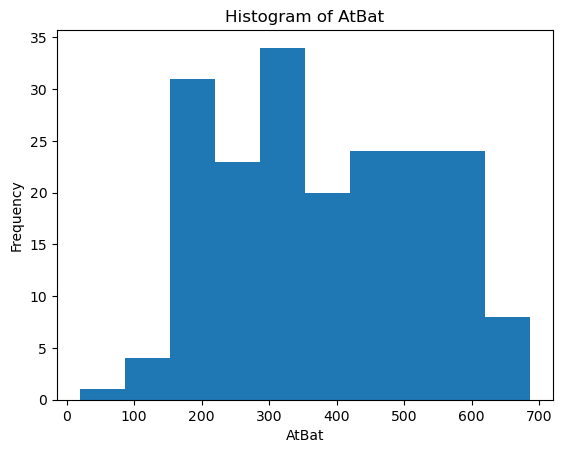

In [ ]:
plt.hist(Train['AtBat'], bins = 10)
plt.xlabel('AtBat')
plt.ylabel('Frequency')
plt.title('Histogram of AtBat')
plt.show()

### Let's standardize the AtBat feature (i.e., normalize by z-scores). We'll create a new column in the training data called 'AtBat_st' to represent this.

In [45]:
Train['AtBat_st'] = (Train['AtBat'] - Train['AtBat'].mean()) / Train['AtBat'].std()
Train['AtBat_st']

3      0.783715
63    -1.138317
27     0.632698
130   -0.520521
93     0.886681
         ...   
308    0.673885
90    -0.465605
147    1.490748
232   -0.472470
72     0.893546
Name: AtBat_st, Length: 193, dtype: float64

### How many rows have an 'AtBat' value within the first standard deviation?

Hint: the 'len' magic method returns the number of rows of a dataFrame.

In [ ]:
print(Hitters['AtBat'])
stdev = Train['AtBat'].std()
mean = Train['AtBat'].mean()
upper = mean + stdev
lower = mean - stdev
within_one_std = Hitters[(Hitters['AtBat'] >= lower) & (Hitters['AtBat'] <= upper)]
print("\nRows: ")
within_one_std

0      293
1      315
2      479
3      496
4      321
      ... 
317    497
318    492
319    475
320    573
321    631
Name: AtBat, Length: 322, dtype: int64

Rows: 
181


### Going back to the results of the 'describe' method, how can you tell that the 'Salary' variable has missing values?

You can tell the 'Salary' variables has missing values because when you look at the counts row for all the variables, the count is 193, however, for the 'Salary' attribute, the count says 164, indicating there are a few missing values.

### Describe a situation where a variable could have missing values but this would not be reflected in the results of the 'describe' method.

A situation where a variable could have missing values but not be reflected in the results of the 'describe' method would be where the missing values are entered as 0 or another aribitrary value other than null.

### On the training data, create separate boxplots of the 'AtBat' variable for when 'Salary' is populated or missing.

Text(0.5, 1.0, 'Boxplots of AtBat for Missing and Populated Salary')

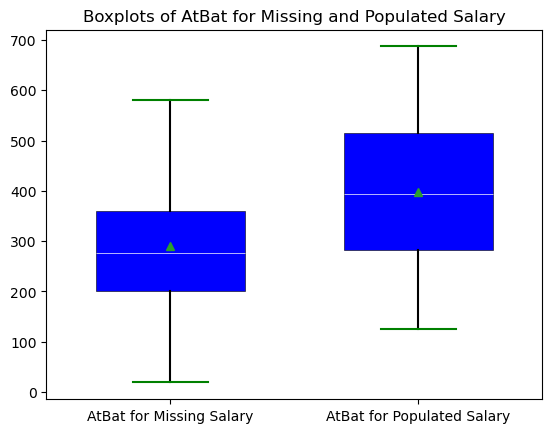

In [72]:
atbat_missing = Train.loc[Train['Salary'].isna(), 'AtBat']
atbat_pop = Train.loc[Train['Salary'].notna(), 'AtBat']
fig, ax = plt.subplots()
ax.boxplot([atbat_missing, atbat_pop],
           positions=[1,2],
           widths=0.6,
           patch_artist=True,
           showmeans=True,
           showfliers=True,
           medianprops={"color": "white", "linewidth": 0.5},
           boxprops={"facecolor": "blue", "edgecolor": "black", "linewidth": 0.4},
           whiskerprops={"color": "black", "linewidth": 1.5}, 
           capprops={"color": "green", "linewidth": 1.5})


ax.set_xticklabels(["AtBat for Missing Salary","AtBat for Populated Salary"])
ax.set_title("Boxplots of AtBat for Missing and Populated Salary")


### Create a correlation matrix for all numeric features in the training set

In [73]:
numeric_cols = Train.select_dtypes(include=np.number).columns
corr_matrix = Train[numeric_cols].corr()
corr_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,AtBat_st
AtBat,1.000000,0.963324,0.540323,0.906579,0.798717,0.631824,-0.039232,0.126602,0.146763,0.150166,0.164892,0.145779,0.056578,0.345879,0.363085,0.368162,0.401390,1.000000
Hits,0.963324,1.000000,0.516853,0.914739,0.795316,0.605876,-0.028717,0.133316,0.163329,0.136865,0.175542,0.153011,0.065178,0.312858,0.310422,0.301725,0.432558,0.963324
HmRun,0.540323,0.516853,1.000000,0.618439,0.840613,0.385425,0.009072,0.078981,0.076914,0.411917,0.110767,0.218285,0.080296,0.222084,-0.069088,0.062840,0.326021,0.540323
Runs,0.906579,0.914739,0.618439,1.000000,0.786635,0.711346,-0.069584,0.083770,0.103859,0.160979,0.159683,0.115628,0.099025,0.289952,0.184714,0.217297,0.441499,0.906579
RBI,0.798717,0.795316,0.840613,0.786635,1.000000,0.553527,0.046705,0.165837,0.180526,0.375072,0.191452,0.285074,0.117109,0.323825,0.138896,0.217983,0.414623,0.798717
Walks,0.631824,0.605876,0.385425,0.711346,0.553527,1.000000,0.037943,0.137157,0.147019,0.194766,0.205250,0.167453,0.312812,0.317000,0.139008,0.160753,0.458462,0.631824
Years,-0.039232,-0.028717,0.009072,-0.069584,0.046705,0.037943,1.000000,0.925308,0.906857,0.730478,0.882559,0.882835,0.836809,0.071301,-0.091915,-0.160476,0.541390,-0.039232
CAtBat,0.126602,0.133316,0.078981,0.083770,0.165837,0.137157,0.925308,1.000000,0.995185,0.775167,0.979705,0.948617,0.894573,0.120875,-0.000507,-0.068187,0.616677,0.126602
CHits,0.146763,0.163329,0.076914,0.103859,0.180526,0.147019,0.906857,0.995185,1.000000,0.761920,0.983128,0.945002,0.883547,0.132818,-0.003372,-0.062669,0.629875,0.146763
CHmRun,0.150166,0.136865,0.411917,0.160979,0.375072,0.194766,0.730478,0.775167,0.761920,1.000000,0.782490,0.912134,0.750795,0.126756,-0.129640,-0.141514,0.616170,0.150166


### Propose two different ways of imputing the missing values of Salary while taking advantage of the information given in the boxplots or the correlation matrix.

One way we can impute the missing values of Salary is by using the boxplots and replacing all the missing values with the median. Another way we can impute the missing values is by using the correlation matrix to train a linear model on non-missing data of features with high correlation to Salary, and predict the missing values.

### For our last exercise, we'll explore Hits and Walks relative to AtBat totals. 
- Use the sum function to calculuate the totals of each of these three variables for the 1986 season (on the training set). 
- Create a pie chart which shows total hits, total walks, and remaining total (neither) as percents of the At Bats total (on the training set). 

In [74]:
TotHits = sum(Train['Hits'])
TotWalks = sum(Train['Walks'])
TotAtBat = sum(Train['AtBat'])

Labels = ['Hits', 'Walks', 'Neither']
Totals = [TotHits, TotWalks, TotAtBat-TotHits-TotWalks]

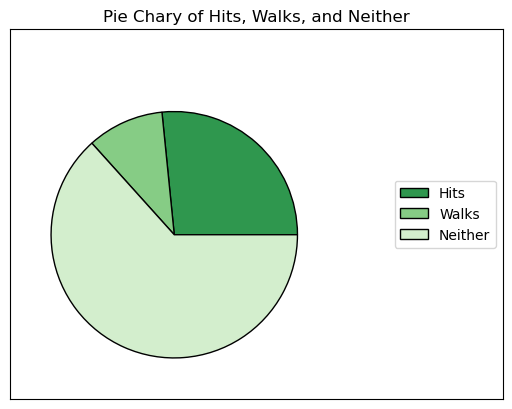

In [88]:
# pie chart
Totals = [TotHits/TotAtBat, TotWalks/TotAtBat, (TotAtBat-TotHits-TotWalks)/TotAtBat]
colors = plt.get_cmap('Greens')(np.linspace(0.7, 0.2, len(Totals)))
# Create a figure and axes
fig, ax = plt.subplots()

# Create the pie chart
ax.pie(Totals, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "black"}, frame=True)

# Include a legend
ax.legend(["Hits", "Walks", "Neither"], loc="right")

# Adjust the axes
ax.set(xlim=(0, 12), xticks=np.arange(1, 8),
       ylim=(0, 9), yticks=np.arange(1, 8))
ax.tick_params(left = False, labelleft = False, 
               bottom = False, labelbottom = False)
ax.set(title="Pie Chary of Hits, Walks, and Neither")

plt.show()

### The previous two cells gave us totals across all players. For each player in the training set, calculate the Hits as a percent of AtBat and store it in a new variable called 'AVG'

In [77]:
Train['AVG'] = Train['Hits'] / Train['AtBat']
Train['AVG']


3      0.284274
63     0.245370
27     0.272152
130    0.339869
93     0.270059
         ...   
308    0.233333
90     0.264331
147    0.305509
232    0.265176
72     0.255859
Name: AVG, Length: 193, dtype: float64

### Using 0.25 and 0.31 as the split points, create a new variable with three bins: high, medium, and low. 

In [79]:
Train['AVG_bin'] = 'medium'
Train.loc[Train['AVG'] < 0.25, 'AVG_bin'] = 'low'
Train.loc[Train['AVG'] > 0.31, 'AVG_bin'] = 'high'

### Create a bar chart that displays the number of players in each of the low, medium, and high categories (for the training data).

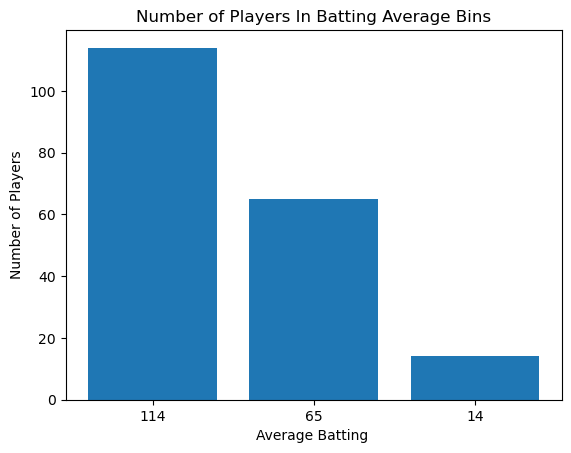

In [81]:
players = Train['AVG_bin'].value_counts()
plt.bar(players.index, players.values)
plt.title("Number of Players In Batting Average Bins")
plt.ylabel("Number of Players")
plt.xlabel("Average Batting ")
plt.xticks(range(len(players)), players)

plt.show()

Notice that the order of the bars will be medium, low, high. That's counterintuitive. We can reorder these quickly. 

In [82]:
indexMap = ['low', 'medium', 'high']
reordered_list = [Train['AVG_bin'].value_counts()[i] for i in indexMap]

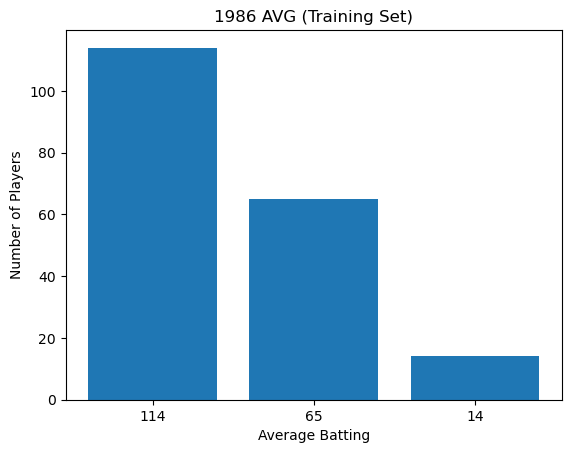

In [83]:
plt.bar(players.index, players.values)

plt.title("1986 AVG (Training Set)")
plt.ylabel("Number of Players")
plt.xlabel("Average Batting")
plt.xticks(range(len(players)), players)

plt.show()

### Did we use the depth method or width method for creating these bins? Explain.

For creating these bins, we used the width method. We had split intervals at 0.25 and 0.31 instead of just splitting them by the number of values within each bin, which is the depth method.